<a href="https://colab.research.google.com/github/andres-merino/Minicurso-ProcesamientoImagenes/blob/main/ProcesamientoImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: 1px solid white;border-collapse: collapse;" >
<tr>
  <td style="width:20%;vertical-align:middle;padding-right: 10;"> <img src="https://i.imgur.com/nt7hloA.png" width="100"> </td>
  <td><p style="margin: 0; text-align:left; font-variant: small-caps; font-size: 20px; color:#0030A1; font-weight: bold;">Facultad de Ciencias Exactas y Naturales</p>
    <p style="margin: 0; text-align:left; font-variant: small-caps; font-size: 20px; color:#0030A1; font-weight: bold;">Escuela de Verano de Aprendizaje Automático</p>
    <p style="margin: 0; text-align:left; font-variant: small-caps; font-size: 20px; color:#0030A1;">Procesamiento y Análisis de imágenes</p>
    <p style="margin: 0; text-align:left; color:#0030A1; font-style: oblique;">Andrés Merino &bull; Septiembre 2024</p>
  </td>  
</tr>
</table>

---
## <font color='264CC7'> Configuración Inicial</font>
---

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

from urllib.request import urlretrieve

# Descargar la imagen
urlretrieve("https://raw.githubusercontent.com/andres-merino/Minicurso-ProcesamientoImagenes/main/Imagenes/aurelio.png", "/content/aurelio.png")
urlretrieve("https://raw.githubusercontent.com/andres-merino/Minicurso-ProcesamientoImagenes/main/Imagenes/OsoAurelio.jpg", "/content/OsoAurelio.jpg")

('/content/OsoAurelio.jpg', <http.client.HTTPMessage at 0x78165533f5e0>)

---
## <font color='264CC7'> Reducción y ampliación de Imágenes</font>
---

Leemos la imagen:

(671, 581, 3)


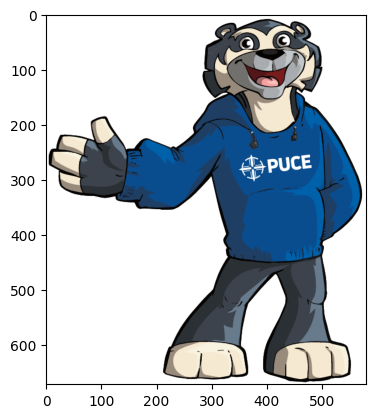

In [2]:
img = plt.imread('aurelio.png')
print(img.shape)
plt.imshow(img)
plt.show()

Reducimos eliminando filas y columnas, saltando una:

(336, 291, 3)


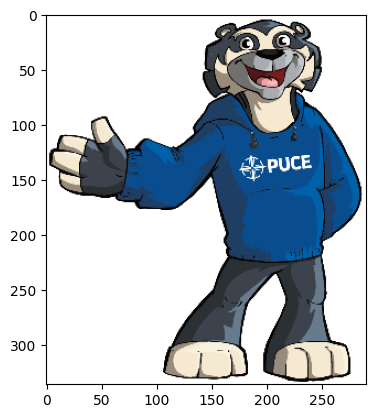

In [3]:
img_reducida = img[::2, ::2, :]
print(img_reducida.shape)
plt.imshow(img_reducida)
plt.show()

Recostruimos la imagen con interpolación lineal:

(671, 581, 3)


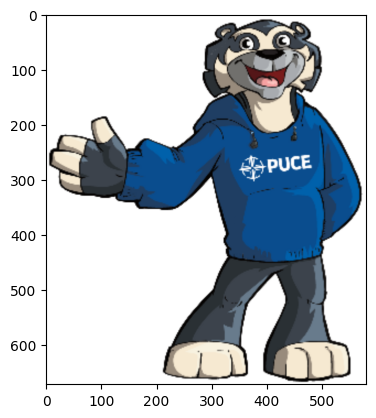

In [4]:
img_ampliada =cv2.resize(img_reducida, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_LINEAR)
print(img_ampliada.shape)
plt.imshow(img_ampliada)
plt.show()


Podemos probar otros tipos de interpolación:
- cv2.INTER_NEAREST
- cv2.INTER_LINEAR
- cv2.INTER_AREA
- cv2.INTER_CUBIC
- cv2.INTER_LANCZOS4

(671, 581, 3)


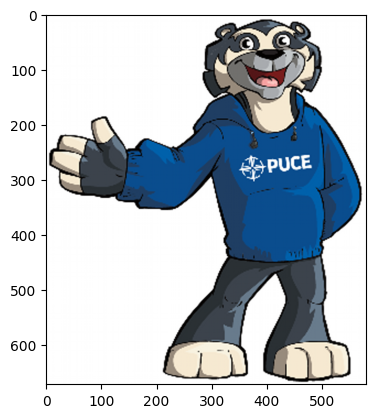

In [5]:
img_ampliada =cv2.resize(img_reducida, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
print(img_ampliada.shape)
plt.imshow(img_ampliada)
plt.show()

---
## <font color='264CC7'> Filtros</font>
---

Leemos la imagen:

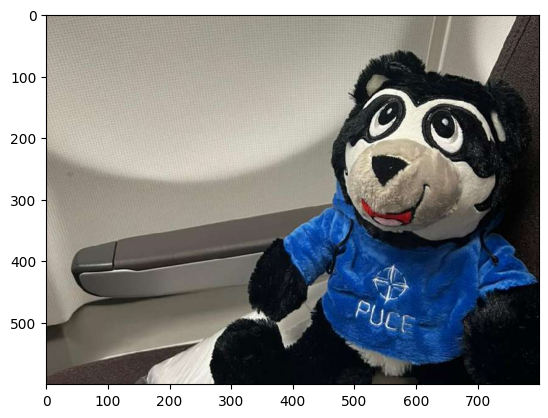

In [6]:
img = plt.imread('OsoAurelio.jpg')
plt.imshow(img)
plt.show()

Aplicamos el flitro dado por la siguiente matriz
$$
    \begin{pmatrix}
    -2 & -1 & 0 \\
    -1 & 1 & 1 \\
    0 & 1 & 1   
    \end{pmatrix}.
$$

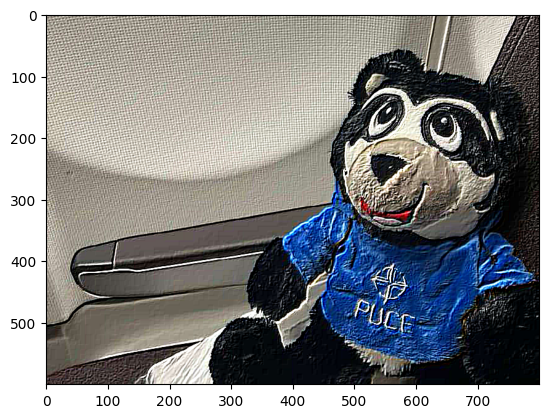

In [7]:
filtro = np.array([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ])

img_f1 = cv2.filter2D(img, kernel=filtro, ddepth=-1)

plt.imshow(img_f1)
plt.show()

Probamos con otros filtros:
$$
    \begin{pmatrix}
    -1 & -1 & -1 \\
    0 & 0 & 0 \\
    1 & 1 & 1   
    \end{pmatrix};
    \quad
    \begin{pmatrix}
    1 & 0 & -1 \\
    1 & 0 & -1 \\
    1 & 0 & -1
    \end{pmatrix}.
$$

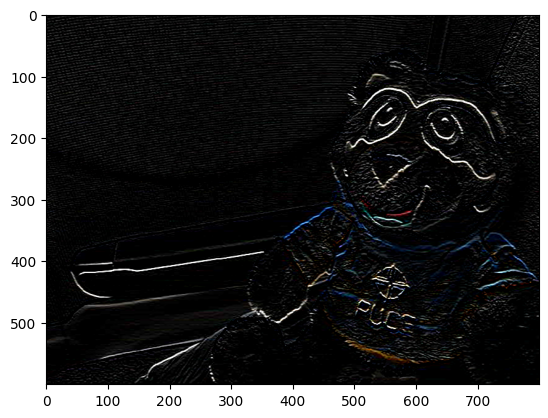

In [8]:
filtro = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])

img_f2 = cv2.filter2D(img, kernel=filtro, ddepth=-1)

plt.imshow(img_f2)
plt.show()

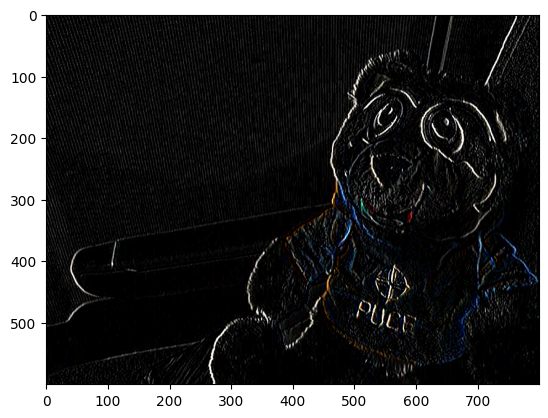

In [9]:
filtro = np.array([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ])

img_f2 = cv2.filter2D(img, kernel=filtro, ddepth=-1)

plt.imshow(img_f2)
plt.show()

---
## <font color='264CC7'> Redes convolucionales</font>
---

In [48]:
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import math

### <font color='264CC7'> Lectura de datos</font>

In [72]:
#Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
datos, metadatos = tfds.load('cifar10', as_supervised=True, with_info=True)

#Obtener en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_train, datos_test = datos['train'], datos['test']

In [62]:
datos_train.take(1).element_spec

(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

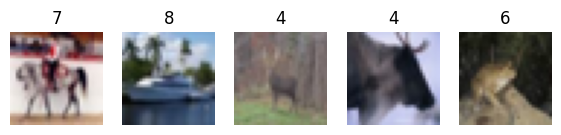

In [63]:
plt.figure(figsize=(7,7))

for i, (imagen, etiqueta) in enumerate(datos_train.take(5)):
    imagen = imagen.numpy()
    plt.subplot(5,5,i+1)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.title(etiqueta.numpy())
    plt.axis('off')
plt.show()

### <font color='264CC7'> Redes densa</font>

In [73]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales todavia)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

modelo.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 50)                  │         153,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,710 (612.15 KB)

 Trainable params: 156,710 (612.15 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Cantidad de datos de entrenamiento
num_datos_train = metadatos.splits["train"].num_examples
print("Imagenes de entrenamiento:",num_datos_train)

# Coloco en lotes
datos_train = datos_train.repeat().shuffle(num_datos_train).batch(32)
datos_test = datos_test.batch(32)

Imagenes de entrenamiento: 50000


In [75]:
historial = modelo.fit(
    datos_train,
    epochs=5,
    steps_per_epoch=1875
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.1045 - loss: 14.3004
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0988 - loss: 2.3027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0994 - loss: 2.3027
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1015 - loss: 2.3027
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0995 - loss: 2.3027


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


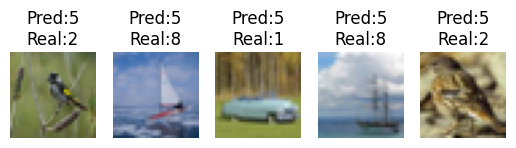

In [76]:
for i, (imagenes, etiquetas_reales) in enumerate(datos_test.take(1)):
    # Hacer predicciones
    predicciones = modelo.predict(imagenes)

    for j in range(5):
        imagen = imagenes[j+26].numpy()
        plt.subplot(1, 5, j+1)
        plt.imshow(imagen, cmap=plt.cm.binary)
        plt.title(f"Pred:{tf.argmax(predicciones[j+26]).numpy()}\nReal:{etiquetas_reales[j+26].numpy()}")
        plt.axis('off')
    plt.show()

In [77]:
# Evaluar el modelo en el conjunto de prueba
resultado = modelo.evaluate(datos_test)

# resultado[0] es la pérdida, resultado[1] es la precisión
print(f'Precisión en el conjunto de prueba: {resultado[1]:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1033 - loss: 2.3022
Precisión en el conjunto de prueba: 0.1000


In [78]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), input_shape=(32,32,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

modelo.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 16)                  │           9,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,794 (42.16 KB)

 Trainable params: 10,794 (42.16 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
historial = modelo.fit(
    datos_train,
    epochs=5,
    steps_per_epoch=1875
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.1007 - loss: 3.6093
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.1002 - loss: 2.3027
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.1024 - loss: 2.3028
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.0984 - loss: 2.3028
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.1015 - loss: 2.3026


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


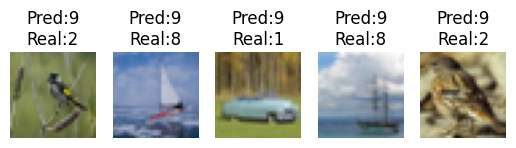

In [80]:
for i, (imagenes, etiquetas_reales) in enumerate(datos_test.take(1)):
    # Hacer predicciones
    predicciones = modelo.predict(imagenes)

    for j in range(5):
        imagen = imagenes[j+26].numpy()
        plt.subplot(1, 5, j+1)
        plt.imshow(imagen, cmap=plt.cm.binary)
        plt.title(f"Pred:{tf.argmax(predicciones[j+26]).numpy()}\nReal:{etiquetas_reales[j+26].numpy()}")
        plt.axis('off')
    plt.show()

In [81]:
# Evaluar el modelo en el conjunto de prueba
resultado = modelo.evaluate(datos_test)

# resultado[0] es la pérdida, resultado[1] es la precisión
print(f'Precisión en el conjunto de prueba: {resultado[1]:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0976 - loss: 2.3030
Precisión en el conjunto de prueba: 0.1000


model = YOLO('yolov8n.pt')
results = model(img)

plt.imshow(results[0].plot())
plt.show()